# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo clusterização e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv e faça o download do conjunto de dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessamento dos dados e modelo de cluster Kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Load the data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

In [3]:
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


# Exercicio 1. (3.0 pontos)

Faça um gráfico de cotovelo, quantos clusters aproximadamente melhor separam este conjunto de dados informado pelo grafico de cotovelo?

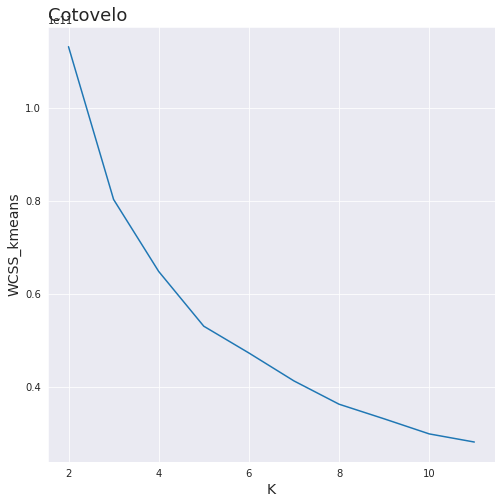

In [4]:
#### VALE 0.5 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
WCSS_kmeans = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=10, n_clusters=k)
    k2.fit(data)
    WCSS_kmeans.append(k2.inertia_)

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 8))

pd.Series(WCSS_kmeans, index=sizes).plot(ax=ax)

ax.set_title('Cotovelo', loc='left', fontsize=18)
ax.set_xlabel('K', fontsize=14)
ax.set_ylabel('WCSS_kmeans', fontsize=14)

plt.show()


**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar. Esta célula de texto esta escrito em Markdown, para renderizar o texto execute a célula com **Shift+Enter**)

De acordo com o gráfico de cotovelo, o melhor número de clusters é 5.

Construa um modelo de **clusterização K-Médias** usando o melhor numero de clusters informado pelo gráfico de cotovelo e usem o parametro **random_state** com valor 10.

In [24]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

X_std = StandardScaler().fit_transform(data)

kmeans5 = KMeans(n_clusters=5, random_state=10)
kmeans5_pred = kmeans5.fit_predict(X_std)

print("K-médias com k = 5")
print('Silhouette Score:', silhouette_score(X_std, kmeans5_pred, metric='euclidean'))

K-médias com k = 5
Silhouette Score: 0.4089322388552013


Adicione o resultado da clusterização no conjunto de dados original, chame essa nova variavel de **cluster** e conte quantas observações há em cada cluster e preencha:

In [12]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

data['cluster'] = kmeans5_pred
data['cluster'].value_counts()

1    211
2    125
0     91
3     11
4      2
Name: cluster, dtype: int64

In [18]:
#### VALE 0.5 pontos
# Substitua __ pelos valores solicitados
# copie a linha de cima, alterando o cluster e preenchendo o total

print('Total de observações do cluster 0: {}'.format(len(data[data['cluster'] == 0])))
print('Total de observações do cluster 1: {}'.format(len(data[data['cluster'] == 1])))
print('Total de observações do cluster 2: {}'.format(len(data[data['cluster'] == 2])))
print('Total de observações do cluster 3: {}'.format(len(data[data['cluster'] == 3])))
print('Total de observações do cluster 4: {}'.format(len(data[data['cluster'] == 4])))

Total de observações do cluster 0: 91
Total de observações do cluster 1: 211
Total de observações do cluster 2: 125
Total de observações do cluster 3: 11
Total de observações do cluster 4: 2


# Exercicio 2. (4.0 pontos)

Escolha dois clusters e separe os dados em dois subconjuntos, chamando-os de clusterA e clusterB.

In [19]:
#### VALE 1.0 ponto
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

clusterA = data[data['cluster'] == 1]
clusterB = data[data['cluster'] == 2]

Utilizaremos a função **.describe()** para obtermos as medidas de média, desvio padrão, valor minimo e valor máximo dos subconjuntos clusterA e clusterB

In [20]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterA

clusterA.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,211.000000,211.0,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.0
mean,1.004739,3.0,13891.473934,3297.379147,3814.625592,3490.218009,788.028436,1301.658768,1.0
std,0.068843,0.0,14768.849940,3534.832049,3413.341704,4406.557879,1099.470924,1763.828951,0.0
min,1.000000,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.0
25%,1.000000,3.0,3702.500000,1188.500000,1666.000000,779.000000,176.500000,378.500000,1.0
50%,1.000000,3.0,9612.000000,2247.000000,2642.000000,1945.000000,385.000000,823.000000,1.0
75%,1.000000,3.0,18821.000000,4115.500000,4927.500000,4494.500000,948.500000,1582.000000,1.0
max,2.000000,3.0,112151.000000,29627.000000,21042.000000,35009.000000,6907.000000,14472.000000,1.0


In [21]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterB

clusterB.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,125.0,125.000000,125.00000,125.000000,125.000000,125.000000,125.00000,125.000000,125.0
mean,2.0,2.672000,7877.64000,8913.512000,14212.624000,1339.280000,6149.59200,1537.168000,2.0
std,0.0,0.644781,7702.17998,4702.858495,6806.232234,1250.843423,3479.70682,1445.361718,0.0
min,2.0,1.000000,18.00000,1124.000000,4523.000000,33.000000,549.00000,3.000000,2.0
25%,2.0,3.000000,1989.00000,6128.000000,9426.000000,480.000000,3712.00000,531.000000,2.0
50%,2.0,3.000000,5417.00000,7704.000000,12144.000000,993.000000,5162.00000,1265.000000,2.0
75%,2.0,3.000000,11867.00000,11103.000000,18881.000000,1741.000000,7677.00000,2098.000000,2.0
max,2.0,3.000000,40721.00000,25862.000000,36486.000000,8132.000000,17120.00000,7844.000000,2.0


Comparando as médias, valores minimos e máximos obtidos, há diferença entre o subconjunto clusterA e clusterB?

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Sim, há diferenças. Os subconjuntos apresentam valores distintos.

Sendo dois agrupamentos distintos, qual rotulo poderiamos utilizar para identifica-los? Justifique a sua resposta

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

# Exercicio 3. (3 pontos)

Responda, quais são as vantagens e desvantagens do algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

**Vantagens:**
Relativamente simples de realizar implementação;
Consegue ser generalizado e adaptado para novos exemplos e clusters de formatos diferentes;
Consegue escalar para grandes conjuntos.

**Desvantagens**
O gráfico de cotovelo deve ser interpretado manualmente para escolher o K;
Outliers complicam o agrupamento;
O número de dimensões atrapalha o agrupamento.

Quantos elementos há em cada clusters se o numero de clusters for igual ao total de observações?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Um elemento

Se o parametro **k** for igual a 1, quantos clusters teremos e quantos elementos há em cada cluster?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Não é possível usar k-means com menos de 2 agrupamentos.